# AIR POLLUTION PREDICTION

## Load from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/InfosysSpringboard-Internship/Air_Pollution_Prediction/pollution_dataset.csv'
df = pd.read_csv(file_path)

df.head()

## Load from Local Repo

In [3]:
import pandas as pd
import os

BASE_DIR = os.getcwd()

file_path = os.path.join(BASE_DIR,"..", "datasets", "pollution_dataset.csv")

df = pd.read_csv(file_path)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## import libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


## Check for missing values


In [6]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

## Encode the target label 'Air Quality'


In [7]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [8]:
labelencoder = LabelEncoder()
df['Air Quality'] = labelencoder.fit_transform(df['Air Quality'])

In [9]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


In [10]:
df.describe()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.187553
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.500000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,2.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [11]:
df["Air Quality"].value_counts()


Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

## Define features and target


In [12]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

## Standardize features


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-test split (80-20)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Training Random Forest Classifier


In [15]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Predictions


In [16]:
y_pred = clf.predict(X_test)


### Model evaluation


In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=labelencoder.classes_))

Accuracy: 0.959
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.88      0.90       111
    Moderate       0.97      0.97      0.97       294
        Poor       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



## Training Support Vector Machine (SVC)

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, target_names=labelencoder.classes_))


SVM Accuracy: 0.942
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.89      0.81      0.85       111
    Moderate       0.95      0.96      0.96       294
        Poor       0.83      0.87      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



## Training Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc, target_names=labelencoder.classes_))


Gradient Boosting Accuracy: 0.956
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       409
   Hazardous       0.92      0.87      0.89       111
    Moderate       0.97      0.96      0.96       294
        Poor       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



## Visualizations

### Countplot of Air Quality classes


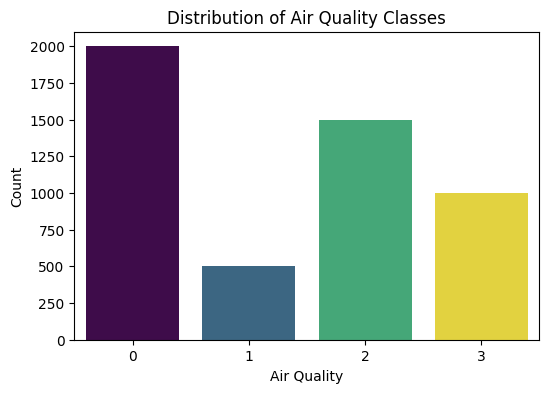

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Air Quality', hue='Air Quality', data=df, palette='viridis', legend=False)
plt.title('Distribution of Air Quality Classes')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()

### Scatter plot: PM10 vs NO2 (color by Air Quality)


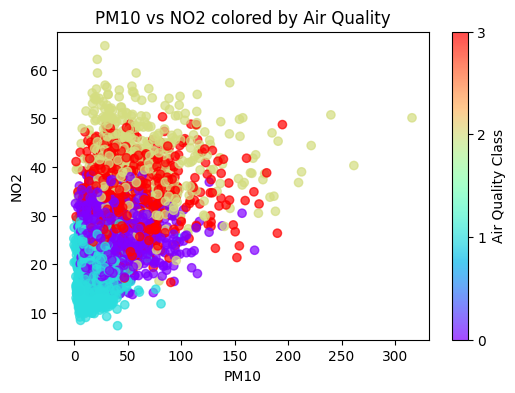

In [20]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(df['PM10'], df['NO2'], c=pd.factorize(df['Air Quality'])[0], cmap='rainbow', alpha=0.7)
plt.colorbar(scatter, ticks=[0,1,2,3], label='Air Quality Class')
plt.title('PM10 vs NO2 colored by Air Quality')
plt.xlabel('PM10')
plt.ylabel('NO2')
plt.show()

# Data Visualization


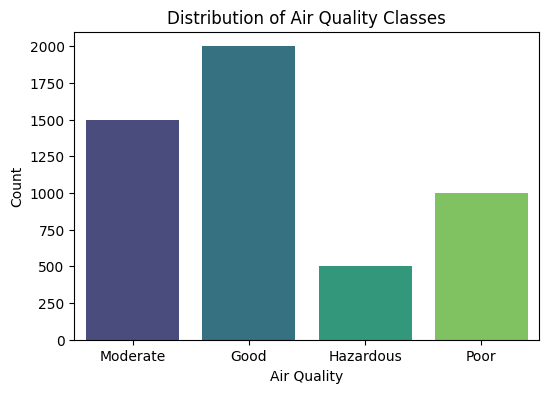

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Air Quality', hue='Air Quality', data=df, palette='viridis', legend=False)
plt.title('Distribution of Air Quality Classes')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()


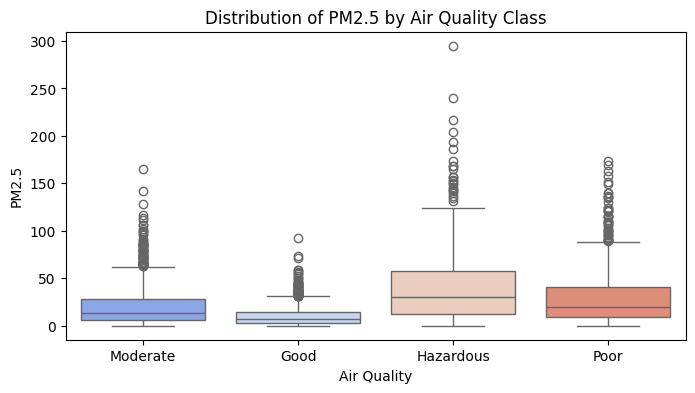

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Air Quality', y='PM2.5', data=df,
            hue='Air Quality',
            palette='coolwarm',
            legend=False)
plt.title('Distribution of PM2.5 by Air Quality Class')
plt.xlabel('Air Quality')
plt.ylabel('PM2.5')
plt.show()

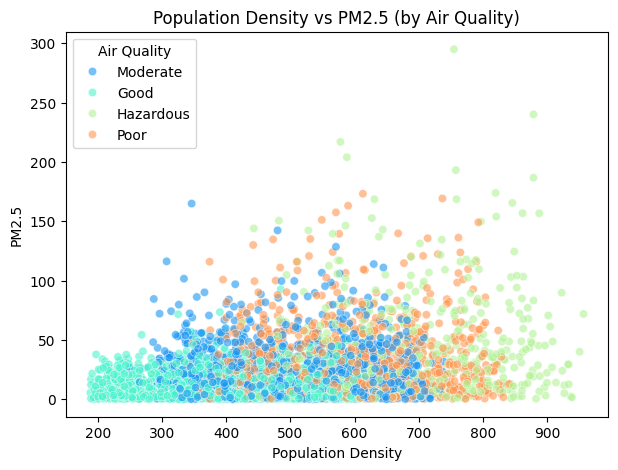

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Population_Density', y='PM2.5', hue='Air Quality', data=df, palette='rainbow', alpha=0.6)
plt.title('Population Density vs PM2.5 (by Air Quality)')
plt.xlabel('Population Density')
plt.ylabel('PM2.5')
plt.show()
